In [1]:
# Description:  This program uses the three moving average crossover strategy
#               to determine when to buy and sell stock

In [2]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
# Load the data
from google.colab import files
uploaded = files.upload()

Saving TSLA.csv to TSLA.csv


In [5]:
# Store the data into a variable
df = pd.read_csv('TSLA.csv')

# Set the index
df = df.set_index(pd.DatetimeIndex(df['Date'].values))

# Show the data
df

,Date,Open,High,Low,Close,Adj Close,Volume
2019-01-02,2019-01-02,306.100006,315.130005,298.799988,310.119995,310.119995,11658600
2019-01-03,2019-01-03,307.000000,309.399994,297.380005,300.359985,300.359985,6965200
2019-01-04,2019-01-04,306.000000,318.000000,302.730011,317.690002,317.690002,7394100
2019-01-07,2019-01-07,321.720001,336.739990,317.750000,334.959991,334.959991,7551200
2019-01-08,2019-01-08,341.959991,344.010010,327.019989,335.350006,335.350006,7008500
...,...,...,...,...,...,...,...
2020-08-07,2020-08-07,1499.540039,1499.750000,1415.010010,1452.709961,1452.709961,8883500
2020-08-10,2020-08-10,1448.000000,1457.500000,1385.839966,1418.569946,1418.569946,7522300
2020-08-11,2020-08-11,1396.000000,1420.000000,1365.000000,1374.390015,1374.390015,8625800
2020-08-12,2020-08-12,1470.000000,1585.000000,1435.000000,1554.760010,1554.760010,21898800


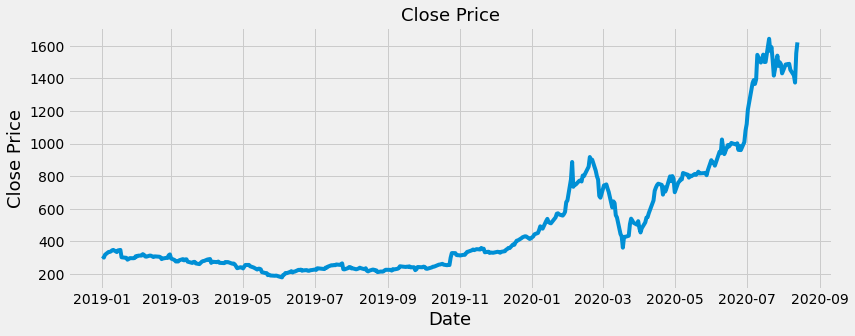

In [9]:
# Visually show the close price
plt.figure(figsize=(12.2,4.5))
plt.title('Close Price', fontsize=18)
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

In [10]:
# Calculate the three moving averages
# Calculate the short/ fast moving average

ShortEMA = df.Close.ewm(span=5, adjust=False).mean()
# Calculate the Middle/Medium exponential moving average
MiddleEMA = df.Close.ewm(span=21, adjust=False).mean()
# Calculate the long/ slow exponential moving everage
LongEMA = df. Close.ewm(span=63, adjust=False).mean()

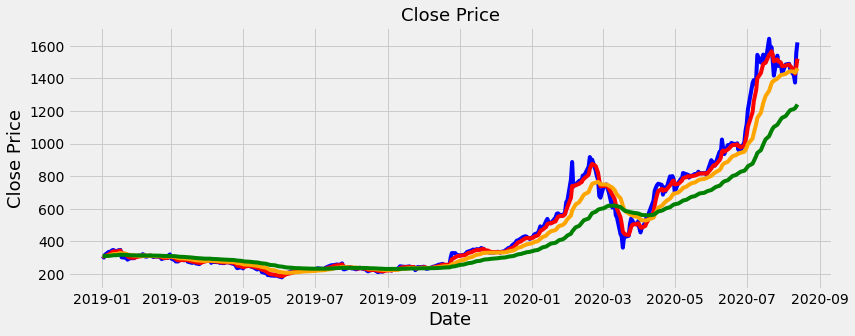

In [11]:
# Visualize the closing price and the exponential moving averages

plt.figure(figsize=(12.2,4.5))
plt.title('Close Price', fontsize=18)
plt.plot(df['Close'], label='Close Price', color='blue')
plt.plot(ShortEMA, label='Short/Fast EMA', color='red')
plt.plot(MiddleEMA, label='Middle/Medium EMA', color='orange')
plt.plot(LongEMA, label='Long/Slow EMA', color='green')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

In [12]:
# Add the exponential moving averages to the data set

df['Short'] = ShortEMA
df['Middle'] = MiddleEMA
df['Long'] = LongEMA

In [14]:
# Show the data

df

,Date,Open,High,Low,Close,Adj Close,Volume,Short,Middle,Long
2019-01-02,2019-01-02,306.100006,315.130005,298.799988,310.119995,310.119995,11658600,310.119995,310.119995,310.119995
2019-01-03,2019-01-03,307.000000,309.399994,297.380005,300.359985,300.359985,6965200,306.866658,309.232721,309.814995
2019-01-04,2019-01-04,306.000000,318.000000,302.730011,317.690002,317.690002,7394100,310.474440,310.001565,310.061089
2019-01-07,2019-01-07,321.720001,336.739990,317.750000,334.959991,334.959991,7551200,318.636290,312.270513,310.839179
2019-01-08,2019-01-08,341.959991,344.010010,327.019989,335.350006,335.350006,7008500,324.207529,314.368649,311.605143
...,...,...,...,...,...,...,...,...,...,...
2020-08-07,2020-08-07,1499.540039,1499.750000,1415.010010,1452.709961,1452.709961,8883500,1474.122999,1443.427993,1205.379759
2020-08-10,2020-08-10,1448.000000,1457.500000,1385.839966,1418.569946,1418.569946,7522300,1455.605315,1441.168170,1212.041953
2020-08-11,2020-08-11,1396.000000,1420.000000,1365.000000,1374.390015,1374.390015,8625800,1428.533548,1435.097429,1217.115330
2020-08-12,2020-08-12,1470.000000,1585.000000,1435.000000,1554.760010,1554.760010,21898800,1470.609035,1445.975845,1227.666726


In [15]:
# Create the function to buy and sell stock
def buy_sell_function(data):
  buy_list = []
  sell_list = []
  flag_long = False
  flag_short = False

  for i in range(0, len(data)):
    if data['Middle'][i] < data['Long'][i] and data['Short'][i] < data['Middle'][i] and flag_long == False and flag_short == False:
      buy_list.append(data['Close'][i])
      sell_list.append(np.nan)
      flag_short = True
    elif flag_short == True and data['Short'][i] > data['Middle'][i]:
      sell_list.append(data['Close'][i])
      buy_list.append(np.nan)
      flag_short = False
    elif data['Middle'][i] > data['Long'][i] and data['Short'][i] > data['Middle'][i] and flag_long == False and flag_short == False:
      buy_list.append(data['Close'][i])
      sell_list.append(np.nan)
      flag_long = True
    elif flag_long == True and data['Short'][i] < data['Middle'][i]:
      sell_list.append(data['Close'][i])
      buy_list.append(np.nan)
      flag_long = False
    else:
      buy_list.append(np.nan)
      sell_list.append(np.nan)

  return (buy_list,sell_list)

In [16]:
# Add the buy and sell signals to the dataset
df['Buy'] = buy_sell_function(df)[0]
df['Sell'] = buy_sell_function(df)[1]

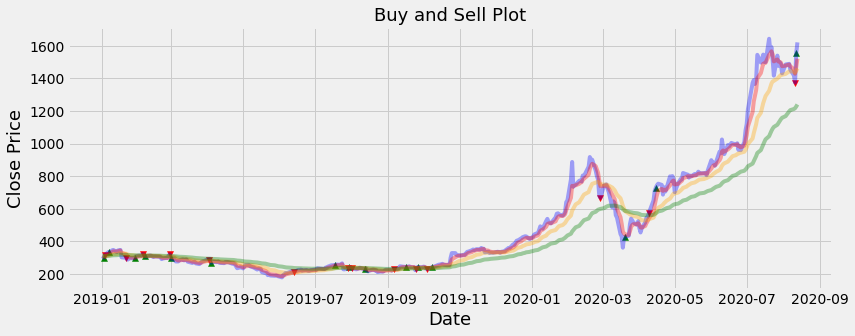

In [19]:
# Visually show the stock buy and sell signals

plt.figure(figsize=(12.2,4.5))
plt.title('Buy and Sell Plot', fontsize=18)
plt.plot(df['Close'], label='Close Price', color='blue', alpha=0.35)
plt.plot(ShortEMA, label='Short/Fast EMA', color='red', alpha=0.35)
plt.plot(MiddleEMA, label='Middle/Medium EMA', color='orange', alpha=0.35)
plt.plot(LongEMA, label='Long/Slow EMA', color='green', alpha=0.35)
plt.scatter(df.index, df['Buy'], color = 'green', marker='^', alpha = 1)
plt.scatter(df.index, df['Sell'], color = 'red', marker='v', alpha = 1)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()